# Explore dataset

In [1]:
# Import Packages
import numpy as np
import pandas as pd

from collections import Counter

import matplotlib.pyplot as plt

import random
import tqdm

import cv2

In [ ]:
work_dir_path = './'

In [2]:
# Data paths
# train_images_path = f'{work_dir_path}data/train_val_split_csv/train/'
# train_labels_path = f'{work_dir_path}data/train_val_split_csv/train.csv'
train_images_path = f'{work_dir_path}data/train_val_split_csv/train10/'
train_labels_path = f'{work_dir_path}data/train_val_split_csv/train10.csv'

val_images_path = f'{work_dir_path}data/train_val_split_csv/val/'
val_labels_path = f'{work_dir_path}data/train_val_split_csv/val.csv'

test_images_path = f'{work_dir_path}data/train_val_split_csv/test/'
test_labels_path = f'{work_dir_path}data/train_val_split_csv/test.csv'

In [3]:
def process_data(image_dir, labels_file):
    """
    Loads labels CSV file, maps image filenames to labels, 
    and returns mappings and character set.
    
    Args:
        image_dir : str 
            Directory containing image files
        labels_file : str 
            Path to CSV file mapping image filenames to labels
        
    Returns 
        img2label : Dict
            Dictionary mapping image filenames to labels 
        chars : List
            Unique sorted character set  
    """

    # Load labels CSV as dataframe
    df = pd.read_csv(labels_file)

    # Map image filenames to labels
    img2label = dict(zip(image_dir + df['image'], df['label']))

    # Get unique sorted character set
    chars = sorted(set(''.join(df['label'])))
    
    return img2label, chars

In [4]:
# Load files
img2label_train, chars_train = process_data(train_images_path, train_labels_path)
img2label_val, chars_val = process_data(val_images_path, val_labels_path)
img2label_test, chars_test = process_data(test_images_path, test_labels_path)

In [5]:
# Combine all sets in to one
img2label = {**img2label_train, **img2label_val, **img2label_test} 
chars = chars_train + chars_val + chars_test

In [6]:
image_names, labels = list(img2label.keys()), [img2label[key] for key in img2label.keys()]

In [11]:
def generate_images(img_paths):
    """Generates images arrays from a list of image paths.

    Args:
        img_paths : list
            List of filepaths for the images to load.
    
    Returns: 
        data_images: list
            List of loaded image arrays.
    """
    
    data_images = []
    for path in tqdm.tqdm(img_paths):
        # Uses OpenCV to load each image into a np array 
        # with integer values from 0-255 and dtype uint8.
        img = cv2.imread(path)
        data_images.append(img.astype('uint8'))
    return data_images

In [12]:
images = generate_images(image_names)

100%|███████████████████████████████████████████████████████████████████████████| 10204/10204 [00:16<00:00, 601.90it/s]



Dataset size: 10204
Max label length: 38

Most common char: о (7957)
Least common char: » (1)

Most common label: что (44)
Least common label: Васильевича (1)



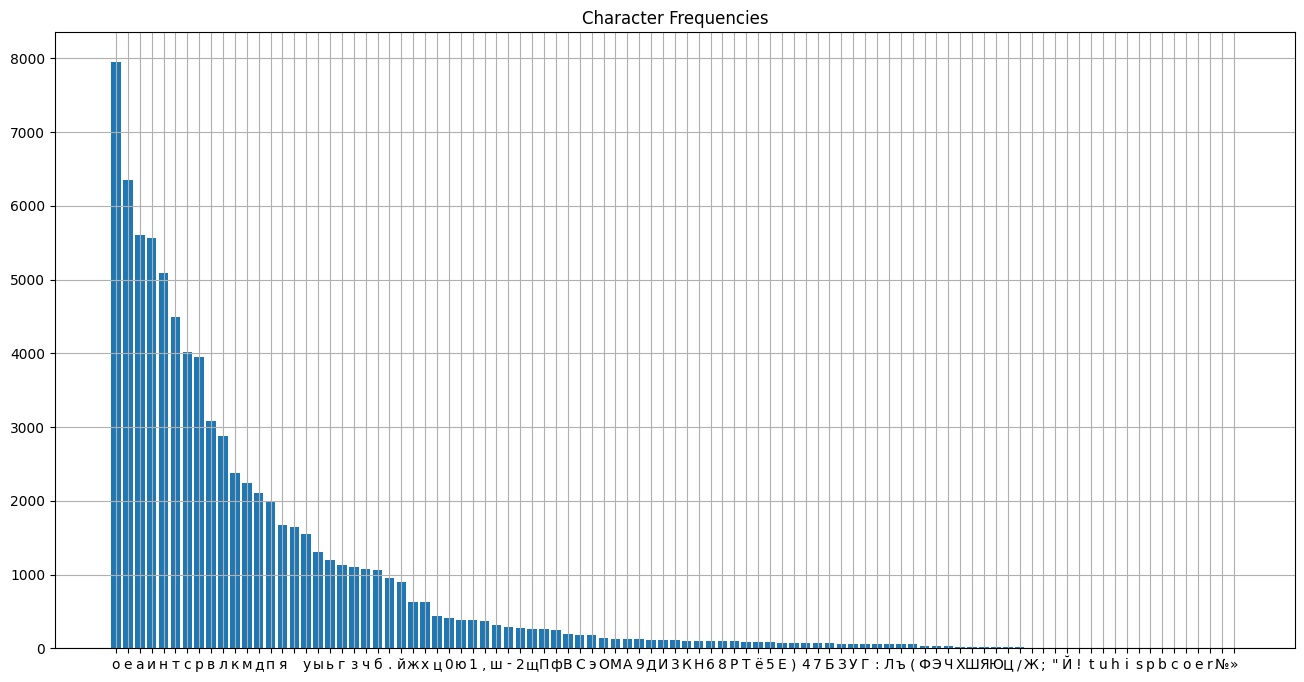

In [13]:
# Analyze lengths
lengths = [len(l) for l in labels]
max_len = max(lengths)

# Count labels per length  
lengths_counter = Counter(lengths)

# Label frequencies
labels_counter = Counter(labels)
common_label, common_count = labels_counter.most_common(1)[0]  
rare_label, rare_count = labels_counter.most_common()[:-2:-1][0]

# Character frequencies 
chars_counter = Counter(''.join(labels)) 
common_char, common_char_count = chars_counter.most_common(1)[0]
rare_char, rare_char_count = chars_counter.most_common()[:-2:-1][0]

# Print statistics  
print(f"""
Dataset size: {len(labels)}
Max label length: {max_len}

Most common char: {common_char} ({common_char_count})
Least common char: {rare_char} ({rare_char_count})

Most common label: {common_label} ({common_count})
Least common label: {rare_label} ({rare_count})
""")

chars_counter = dict(sorted(chars_counter.items(), key=lambda item: -item[1]))

# Visualize character frequencies
plt.figure(figsize=(16, 8))
plt.grid(True)
plt.title("Character Frequencies")
plt.bar(chars_counter.keys(), chars_counter.values())
plt.show()

<BarContainer object of 30 artists>

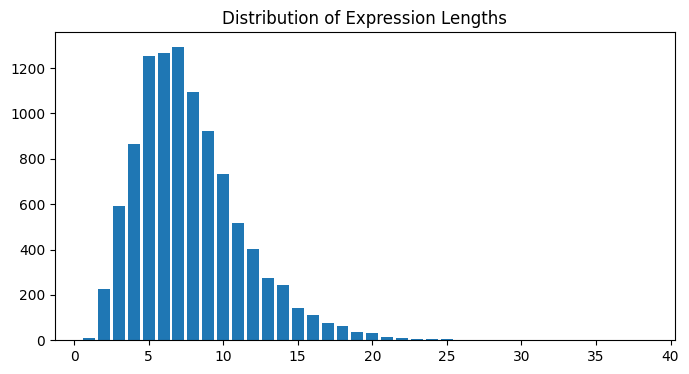

In [18]:
plt.figure(figsize=(8, 4))
plt.title('Distribution of Expression Lengths')
plt.bar(lengths_counter.keys(), lengths_counter.values())

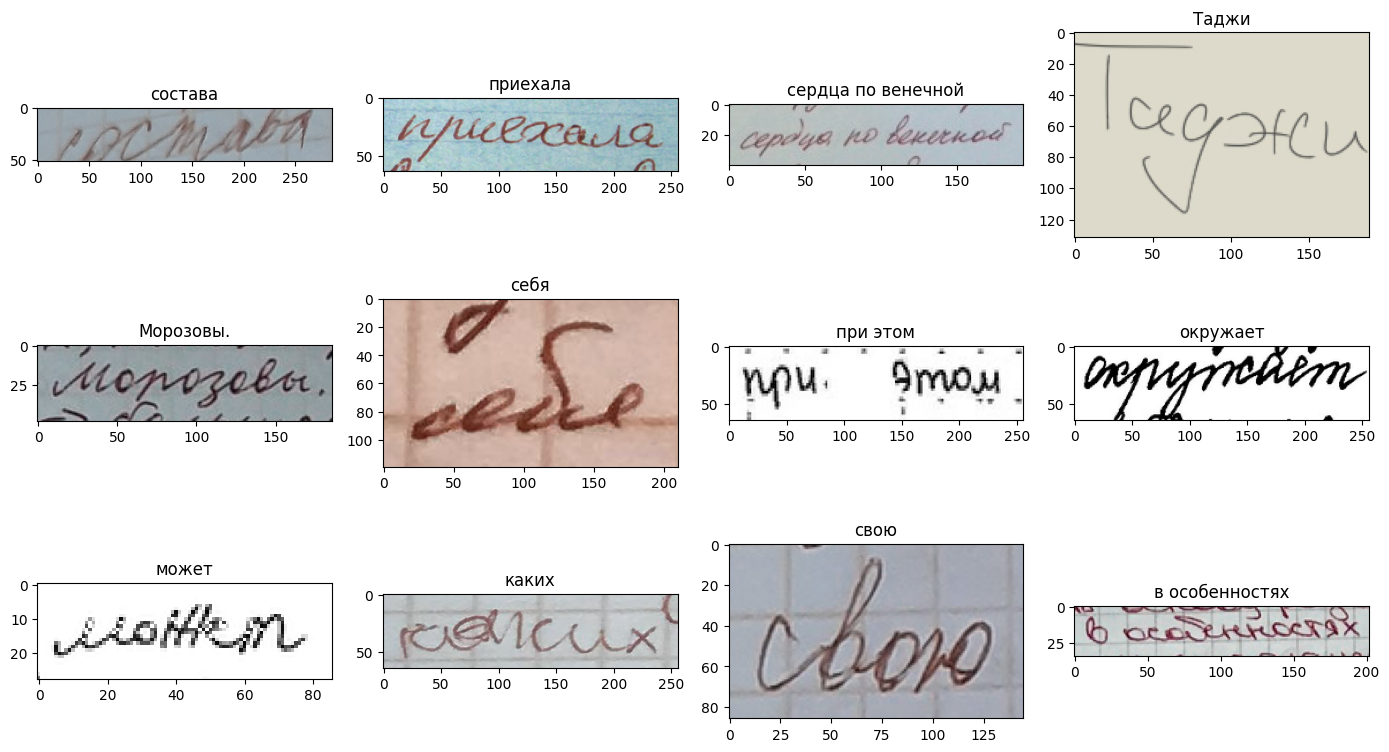

In [19]:
num_examples = 25

# Generate num_examples random examples from the test set
examples = []
for i in range(num_examples):
    # Randomly pick an index 
    idx = random.randint(0, len(images) - 1)
    # idx = i
    # Get the image
    img = images[idx]
    # Get the predicted label
    label = labels[idx]
    examples.append((img, label))

num_cols = 5
num_rows = int(num_examples / num_cols)

# Plot the examples in a grid
fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 8))

for i, example in enumerate(examples):
    img, label = example
    row, col = divmod(i, num_cols)
    img_plot = axs[row, col].imshow(img)
    axs[row, col].set_title(label)
    
plt.tight_layout()
plt.show()

In [20]:
# Get dimensions of each image
heights = [img.shape[0] for img in images] 
widths = [img.shape[1] for img in images]
channels = [img.shape[2] for img in images if len(img.shape) == 3]

# Print out summary statistics
print(f"Number of images: {len(images)}")
print(f"Minimum height: {np.min(heights)}") 
print(f"Maximum height: {np.max(heights)}")
print(f"Minimum width: {np.min(widths)}")
print(f"Maximum width: {np.max(widths)}")
print(f"Number of images with channels: {len(channels)}")
if len(channels) > 0: 
    print(f"Minimum number of channels: {np.min(channels)}")
    print(f"Maximum number of channels: {np.max(channels)}")

Number of images: 10204
Minimum height: 16
Maximum height: 827
Minimum width: 32
Maximum width: 1290
Number of images with channels: 10204
Minimum number of channels: 3
Maximum number of channels: 3


In [7]:
alphabet = [' ', '!', '"', '%', '(', ')', ',', '-', '+', '=', 
            '.', '/', "'", "№",
            '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?',
            '[', ']', '«', '»', 'А', 'Б', 'В', 'Г', 'Д', 'Е', 'Ж', 'З', 'И',
            'Й', 'К', 'Л', 'М', 'Н', 'О', 'П', 'Р', 'С', 'Т', 'У', 'Ф', 'Х',
            'Ц', 'Ч', 'Ш', 'Щ', 'Э', 'Ю', 'Я', 'а', 'б', 'в', 'г', 'д', 'е',
            'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т',
            'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я',
            'ё']

In [8]:
print(set(chars).difference(set(alphabet)))
print(set(alphabet).difference(set(chars)))

{'o', 'c', 'i', 'e', 'r', 'b', 's', 't', 'p', 'u', 'h'}
{'Щ', ']', '«', '%', '?', '=', "'", '+', '['}
